In [237]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score


In [238]:
customer_df = pd.read_csv('/kaggle/input/zeotapdata/Customers.csv')
product_df = pd.read_csv('/kaggle/input/zeotapdata/Products.csv')
transaction_df = pd.read_csv('/kaggle/input/zeotapdata/Transactions.csv')

In [239]:
customer_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [240]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [241]:
customer_df.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [242]:
#Finding the null values if any
customer_missing_percentages = customer_df.isna().sum().sort_values(ascending= False) / len(customer_df)
customer_missing_percentages

CustomerID      0.0
CustomerName    0.0
Region          0.0
SignupDate      0.0
dtype: float64

In [243]:
products_df = pd.read_csv('/kaggle/input/zeotapdata/Products.csv')

In [244]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [245]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [246]:
#Finding the null values if any
product_missing_percentages = products_df.isna().sum().sort_values(ascending= False) / len(products_df)
product_missing_percentages

ProductID      0.0
ProductName    0.0
Category       0.0
Price          0.0
dtype: float64

In [247]:
products_df.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [248]:
transaction_df = pd.read_csv('/kaggle/input/zeotapdata/Transactions.csv')

In [249]:
transaction_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,8/25/24 12:38,1,300.68,300.68
1,T00112,C0146,P067,5/27/24 22:23,1,300.68,300.68
2,T00166,C0127,P067,4/25/24 7:38,1,300.68,300.68
3,T00272,C0087,P067,3/26/24 22:55,2,601.36,300.68
4,T00363,C0070,P067,3/21/24 15:10,3,902.04,300.68


In [250]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [251]:
#Finding the null values if any
transaction_missing_percentages = transaction_df.isna().sum().sort_values(ascending= False) / len(transaction_df)
transaction_missing_percentages

TransactionID      0.0
CustomerID         0.0
ProductID          0.0
TransactionDate    0.0
Quantity           0.0
TotalValue         0.0
Price              0.0
dtype: float64

In [252]:
transaction_df.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [253]:
final_df = pd.merge(
    pd.merge(customer_df, transaction_df, on='CustomerID', how='inner'),
    products_df,
    on='ProductID',
    how='inner'
)

final_df.head()

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,1/19/24 3:12,2,114.60,57.30,SoundWave Cookbook,Books,57.30
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,9/17/24 9:01,3,412.62,137.54,HomeSense Wall Art,Home Decor,137.54
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,4/8/24 0:01,2,614.94,307.47,SoundWave Headphones,Electronics,307.47
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,5/7/24 3:11,2,911.44,455.72,ActiveWear Smartwatch,Electronics,455.72
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,11/2/24 17:04,3,1300.92,433.64,TechPro Headphones,Electronics,433.64


In [254]:
final_df.drop('Price_y', axis=1, inplace=True)

In [255]:
final_df

,CustomerID,CustomerName,Region,SignupDate,TransactionID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category
0,C0001,Lawrence Carroll,South America,2022-07-10,T00015,P054,1/19/24 3:12,2,114.60,57.30,SoundWave Cookbook,Books
1,C0001,Lawrence Carroll,South America,2022-07-10,T00932,P022,9/17/24 9:01,3,412.62,137.54,HomeSense Wall Art,Home Decor
2,C0001,Lawrence Carroll,South America,2022-07-10,T00085,P096,4/8/24 0:01,2,614.94,307.47,SoundWave Headphones,Electronics
3,C0001,Lawrence Carroll,South America,2022-07-10,T00445,P083,5/7/24 3:11,2,911.44,455.72,ActiveWear Smartwatch,Electronics
4,C0001,Lawrence Carroll,South America,2022-07-10,T00436,P029,11/2/24 17:04,3,1300.92,433.64,TechPro Headphones,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,C0200,Kelly Cross,Asia,2023-06-11,T00518,P034,12/11/24 3:05,4,868.20,217.05,HomeSense T-Shirt,Clothing
996,C0200,Kelly Cross,Asia,2023-06-11,T00091,P057,4/27/24 19:06,1,239.70,239.70,ActiveWear Smartphone,Electronics
997,C0200,Kelly Cross,Asia,2023-06-11,T00731,P061,7/15/24 20:36,4,627.84,156.96,HomeSense Desk Lamp,Home Decor
998,C0200,Kelly Cross,Asia,2023-06-11,T00771,P048,9/10/24 9:50,4,1665.60,416.40,TechPro Cookbook,Books


In [256]:
# Extracting features for segmentation:
customer_features = final_df.groupby('CustomerID').agg(
    total_spend=('TotalValue', 'sum'),
    num_transactions=('TransactionID', 'count'),
    avg_transaction_value=('TotalValue', 'mean')
).reset_index()

In [257]:
# One-hot encoding for product categories
category_freq = pd.get_dummies(final_df['Category']).groupby(final_df['CustomerID']).sum()
final1_df = pd.merge(customer_features, category_freq, on='CustomerID')

In [258]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final1_df.drop(columns='CustomerID'))

In [259]:
# Splitting data into training and test sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=3)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

Training data shape: (159, 7)
Test data shape: (40, 7)


In [260]:
kmeans = KMeans(n_clusters=2, random_state=3)
kmeans.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=3)

In [261]:
# Assign clusters to the training data
train_clusters = kmeans.predict(X_train)
test_clusters = kmeans.predict(X_test)
# Adding the cluster assignment to the final_df for analysis
final1_df['Cluster'] = kmeans.predict(X_scaled)

In [262]:
# Evaluate clustering using Davies-Bouldin Index (lower is better)
db_index = davies_bouldin_score(X_scaled, final1_df['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 1.602334696177084


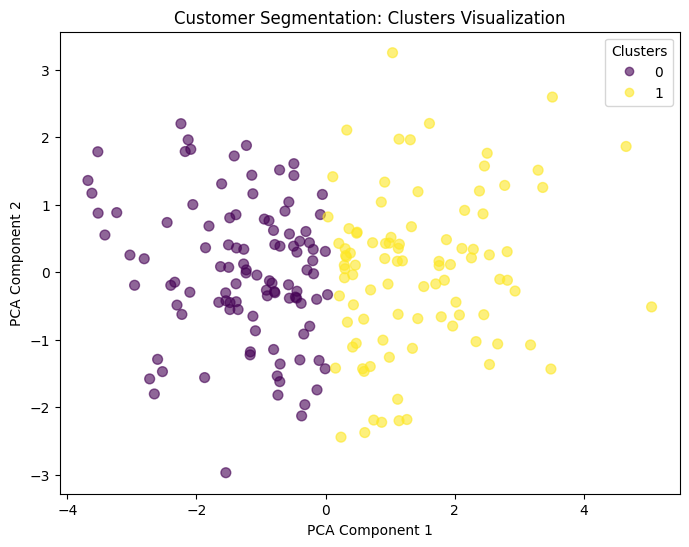

In [263]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # X_scaled is the scaled data used for clustering

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Scatter plot of customers with different colors for each cluster
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=final1_df['Cluster'], cmap='viridis', s=50, alpha=0.6)

# Add labels and title
plt.title('Customer Segmentation: Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Add a color legend to indicate clusters
plt.legend(*scatter.legend_elements(), title="Clusters")

# Display the plot
plt.show()

In [264]:
silhouette_avg = silhouette_score(X_scaled, final1_df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.2254


In [265]:
inertia = kmeans.inertia_
print(f'Inertia: {inertia:.4f}')

Inertia: 821.8894
